In [4]:
#importing the dependicnes 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [6]:
#data collection and processing
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car_data.shape

(301, 9)

In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
#Checking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
#checking the distribution of catagorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [16]:
#Encoding the catagorical Data
#Encoidng the fuet tyoe column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7896\1475026224.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [18]:
#Encoding the catagorical Data
#Encoidng the seller tyoe column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7896\292929759.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [17]:
#Encoding the catagorical Data
#Encoidng the transmissione column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7896\565986305.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [19]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [22]:
#Splitting the data into training data and test data
x = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y = car_data['Selling_Price']

In [23]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [24]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [26]:
#Spitting the data into target
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [27]:
#Linear Regression
#Loading the linear regression model

lin_reg = LinearRegression()

In [28]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [31]:
#Model Evaluation
#Predeiction on training data

training_data_pre = lin_reg.predict(x_train)


In [32]:
#R squared error
error_score = metrics.r2_score(y_train,training_data_pre)

In [33]:
print(error_score)

0.8839793496750801


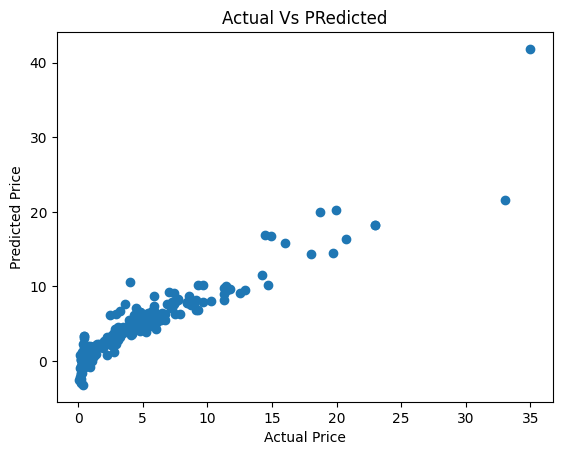

In [34]:
#Visualize the actual prices and predicted prices

plt.scatter(y_train,training_data_pre)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs PRedicted")
plt.show()

In [38]:
#Test data prediction
test_data_pre = lin_reg.predict(x_test)
error_score = metrics.r2_score(y_test,test_data_pre)
print(error_score)

0.8468053957654199


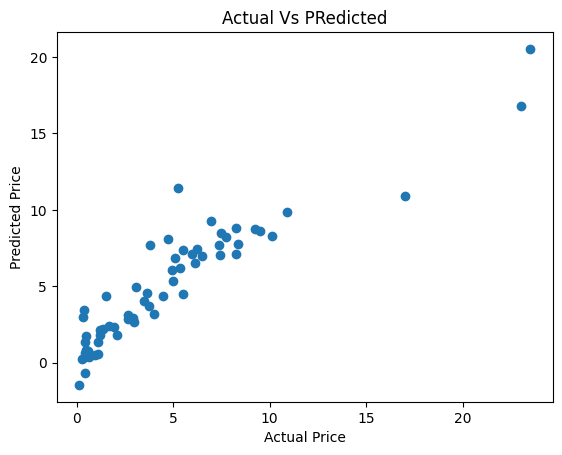

In [39]:
#Visualize the actual prices and predicted prices

plt.scatter(y_test,test_data_pre)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs PRedicted")
plt.show()

In [40]:
#Using lasso regression model
las_reg = Lasso()

In [41]:
las_reg.fit(x_train,y_train)

Lasso()

In [47]:
#evaluating the model
train_data_pre = las_reg.predict(x_train)
error_score = metrics.r2_score(y_train,training_data_pre)
print(error_score)

0.8839793496750801


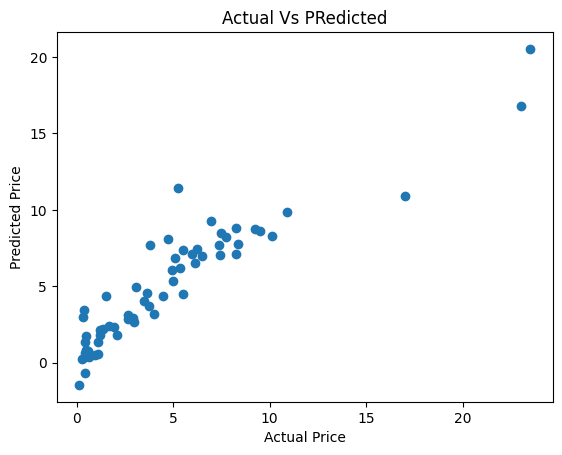

In [48]:
#Visualize the actual prices and predicted prices

plt.scatter(y_test,test_data_pre)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs PRedicted")
plt.show()

In [49]:
#Test data evalutaion
test_data_pre = las_reg.predict(x_test)
error_score = metrics.r2_score(y_test,test_data_pre)
print(error_score)

0.798551246128469


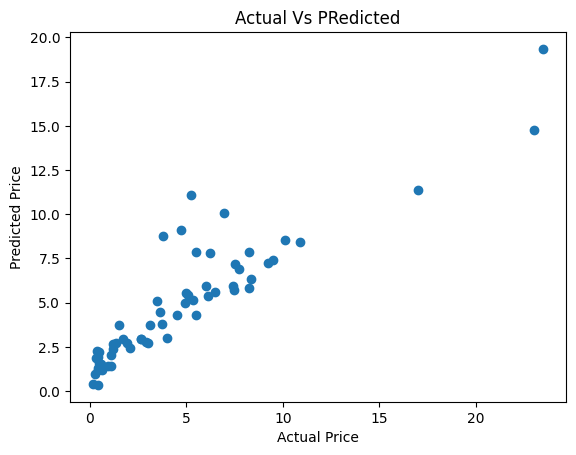

In [50]:
#Visualize the actual prices and predicted prices

plt.scatter(y_test,test_data_pre)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs PRedicted")
plt.show()